## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set seed for replicability
import random
random.seed(1234)

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [3]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [4]:
cards = sample_cards(100, 6, 3)
cards

array([[33, 73, 80],
       [43, 60, 67],
       [15, 29, 37],
       [21, 53, 78],
       [49, 81, 97],
       [11, 59, 76]])

and access the cards of each player with 

In [5]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([33, 73, 80]), array([43, 60, 67]))

The lowest card in the game is

In [6]:
np.min(cards)

11

This function creates a sequence of values from start (1) to stop (5) minus 1. 

In [7]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

In [8]:
# Make 100 draws
card_draws = [sample_cards(100, 6, 3) for i in range(100)]
card_draws

[array([[ 40,  62,  67],
        [ 29,  49,  87],
        [ 37,  94, 100],
        [  3,  56,  98],
        [  9,  39,  73],
        [ 15,  80,  99]]),
 array([[35, 76, 93],
        [10, 26, 85],
        [29, 59, 99],
        [ 5, 13, 75],
        [ 6, 25, 90],
        [11, 63, 95]]),
 array([[27, 85, 92],
        [37, 69, 83],
        [11, 16, 96],
        [44, 50, 58],
        [ 5, 28, 53],
        [40, 59, 68]]),
 array([[14, 20, 66],
        [ 1, 31, 88],
        [ 8, 73, 89],
        [36, 40, 65],
        [30, 68, 87],
        [23, 29, 50]]),
 array([[ 8, 17, 39],
        [15, 34, 57],
        [76, 85, 91],
        [27, 42, 48],
        [13, 14, 88],
        [29, 74, 92]]),
 array([[ 47,  60,  61],
        [  9,  17,  33],
        [ 16,  18,  58],
        [ 38,  71,  72],
        [ 20,  27,  31],
        [ 14,  75, 100]]),
 array([[61, 70, 88],
        [13, 43, 66],
        [ 6, 58, 83],
        [ 7, 11, 51],
        [65, 78, 96],
        [17, 19, 35]]),
 array([[ 59,  76,  82],
 

In [9]:
# Get minimum for each draw. Loop over draws, take array minimum
draw_minimums = [np.min(a) for a in card_draws]
draw_minimums

[3,
 5,
 5,
 1,
 8,
 9,
 6,
 7,
 14,
 8,
 2,
 7,
 10,
 2,
 9,
 5,
 4,
 1,
 2,
 3,
 2,
 4,
 5,
 1,
 2,
 1,
 6,
 5,
 1,
 7,
 3,
 13,
 3,
 3,
 9,
 3,
 6,
 1,
 3,
 8,
 10,
 4,
 5,
 15,
 2,
 10,
 1,
 23,
 3,
 3,
 3,
 6,
 10,
 6,
 2,
 3,
 16,
 5,
 3,
 5,
 4,
 1,
 6,
 1,
 12,
 3,
 3,
 7,
 1,
 6,
 4,
 1,
 22,
 4,
 3,
 12,
 13,
 2,
 12,
 9,
 9,
 6,
 5,
 3,
 12,
 2,
 10,
 2,
 5,
 3,
 2,
 14,
 1,
 6,
 10,
 15,
 5,
 11,
 3,
 17]

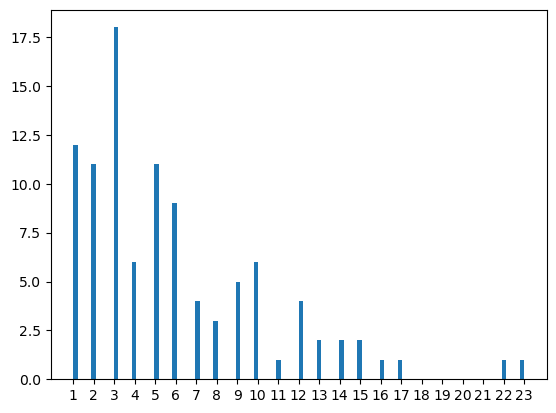

In [10]:
# Histogram, N bins for N cards available
plt.hist(draw_minimums, bins = 100)
#plt.yaxis.set_major_locator(MaxNLocator(integer=True))
# or
#plt.xaxis.set_major_locator(MaxNLocator(integer=True))
# X ticks from 0 to largest value of the min
plt.xticks(range(int(np.min(draw_minimums)), int(np.max(draw_minimums) + 1)))
# Y ticks from 0 to frequency of the most frequent min
#plt.yticks(range(in))
plt.show()

### 2. What is the distribution of the largest gap?

For each simulation, find the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

In [11]:
# Function: Given a game/draw of cards, compute the maximum gap between consecutive cards
def get_max_consecutive_gap(cards):
    # Flatten array to one dimension
    flat_cards = cards.flatten()
    # Get the ordered list of indices that would sort flat_cards
    order_ids = np.argsort(flat_cards)
    # Compute differences between between consecutively ordered cards
    gap_cards = np.diff(flat_cards[order_ids])
    # Return maximum gap between between ordered cards
    return np.max(gap_cards)

In [12]:
# Test function on a known result
# player 1: {30, 90}
# player 2: {2, 25}
test_cards = np.array([[30, 90], [2, 25]])
print(test_cards)
# Should be 60
print(get_max_consecutive_gap(test_cards))

[[30 90]
 [ 2 25]]
60


In [13]:
# Sorted pool of all cards for each draw
#all_cards_for_draw = [np.sort(a.flatten()) for a in card_draws]
# Check we get a sorted length n*k list of scalars
#print(all_cards_for_draw[0:2])

In [14]:
# Get largest gap among consecutive cards
# List to store largest gap for each draw
#largest_gaps = []
# Loop over draws
#for draw in all_cards_for_draw:
    # List to store gap between card and last card
 #   draw_gaps = []
    # Loop over cards/sorted list elements using the index
    # Start with the second card - indices 1 to # cards minus 1
  #  for index in range(1, len(draw)):
   #     draw_gaps.append(draw[index] - draw[index - 1])
    # Largest gap
    #draw_largest_gap = np.max(draw_gaps)
    #largest_gaps.append(draw_largest_gap)
# Check
#print(largest_gaps)

Repeat the experiment but now compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

In [15]:
# Function: Given a game/draw of cards, compute the maximum gap between consecutive cards from different players
# Similar to the earlier function, except that we now keep track of and test differences in player ids, keeping non-zero ones
def get_max_consecutive_gap_between_players(cards):
    # Number of players (n) is the number of rows
    num_players = np.shape(cards)[0]
    print('num players')
    print(num_players)
    # Number of cards per player (k) is the number of columns
    num_cards_per_player = np.shape(cards)[1]
    print('num cards per player')
    print(num_cards_per_player)
    # Create a template with the same shape as the cards, but with player id numbers for tracking after sorting
    # arange creates an array of the player ids ([1, 2, 3, 4, 5, 6], etc.)
    # tile repeats the array k/num_cards times, each time on a new row (since we passed k as a row argument, 1 as col argument)
    # We transpose the result to match the card array shape
    player_ids = np.tile(np.arange(1, num_players + 1), (num_cards_per_player, 1)).T
    print('player ids')
    print(player_ids)
    # Flatten arrays to one dimension
    flat_cards, flat_ids = cards.flatten(), player_ids.flatten()
    print('flat_cards')
    print(flat_cards)
    print('flat ids')
    print(flat_ids)
    # Get the ordered list of indices that would sort flat_cards
    order_ids = np.argsort(flat_cards)
    print('order ids')
    print(order_ids)
    # Compute differences between consecutively ordered cards
    gap_cards = np.diff(flat_cards[order_ids])
    print('gap cards')
    print(gap_cards)
    # Compute gap in ids as well so we can see if the gap is between players with the same id
    gap_ids = np.diff(flat_ids[order_ids])
    print('gap ids')
    print(gap_ids)
    # Set the gap to 0 when it is within the same player
    # Element wise multiplication of gap_cards with an array of indicators for whether the gap is between cards of the same player
    gap_unique = gap_cards * (gap_ids != 0)
    print('gap unique')
    print(gap_unique)
    # Return maximum gap between players
    return np.max(gap_unique)

In [16]:
# If all cards are in play all gaps are 1, so the max gap is 1?
# In this case yes 

# The point seems to be we are calculating gaps first, and then limiting to different players
# We are not computing gaps across players only, then taking the max

In [17]:
# Testing the function on a known result
test_cards = np.array([[50, 75, 78], [15, 21, 46], [14, 39, 77], [63, 70, 96], [19, 26, 33]])
print(test_cards)
# Should be 18
print(get_max_consecutive_gap_between_players(test_cards))

[[50 75 78]
 [15 21 46]
 [14 39 77]
 [63 70 96]
 [19 26 33]]
num players
5
num cards per player
3
player ids
[[1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]
 [5 5 5]]
flat_cards
[50 75 78 15 21 46 14 39 77 63 70 96 19 26 33]
flat ids
[1 1 1 2 2 2 3 3 3 4 4 4 5 5 5]
order ids
[ 6  3 12  4 13 14  7  5  0  9 10  1  8  2 11]
gap cards
[ 1  4  2  5  7  6  7  4 13  7  5  2  1 18]
gap ids
[-1  3 -3  3  0 -2 -1 -1  3  0 -3  2 -2  3]
gap unique
[ 1  4  2  5  0  6  7  4 13  0  5  2  1 18]
18


In [18]:
# Test function on a known result
# player 1: {30, 90}
# player 2: {2, 25}
test_cards = np.array([[30, 90], [2, 25]])
print(test_cards)
# Should be 5
print(get_max_consecutive_gap_between_players(test_cards))

[[30 90]
 [ 2 25]]
num players
2
num cards per player
2
player ids
[[1 1]
 [2 2]]
flat_cards
[30 90  2 25]
flat ids
[1 1 2 2]
order ids
[2 3 0 1]
gap cards
[23  5 60]
gap ids
[ 0 -1  0]
gap unique
[0 5 0]
5


In [19]:
# List for storing the largest gap between players for each draw
#between_p_max_gaps = []

# Loop over card draws
#for a in card_draws:
    # Within the draw/game: Loop over a main player's cards
    # For the player's card, save the gap between it and the lowest card greater than it that belongs to another player
 #   draw_gaps = []
    # Iterate through each of the six players as main player
  #  for main_player_num in range(6):
        # Collapse cards of other players into a list
   #     other_players_cards = []
    #    for other_player_num in [num for num in range(6) if not num == main_player_num]:
     #       for other_player_card_num in range(3):
      #          other_players_cards.append(a[other_player_num, other_player_card_num])
        # Iterate through the main player's cards
       # for main_player_card_num in range(3):
            # Lowest card greater than main_player_card_num in sorted_other_players_cards
        #    next_card = np.min([card for card in other_players_cards if card > a[main_player_num, main_player_card_num]])
            # Calculate gap
         #   gap = next_card - a[main_player_num, main_player_card_num]
            # Append to list of card comparison gaps
          #  draw_gaps.append(gap)
    # Add maximum gap for the draw
    #draw_max_gap = np.max(draw_gaps)
    #between_p_max_gaps.append(draw_max_gap)

In [20]:
# List for storing the largest gap between players for each draw
#between_p_max_gaps = []

# Loop over card draws
#for a in card_draws:
    # Within the draw/game: Loop over combinations of a player, and an other player, and of the player's cards, and of the other player's cards
    # Save the gap in card values for the combo of cards
    # Note some pairs of players and cards will be double counted, but this is OK if we just want the max in a draw
 #   draw_gaps = []
    # Iterate through each of the six players
  #  for player_num in range(6):
        # Iterate through the five other players
   #     for other_player_num in [num for num in range(6) if num < player_num or num > player_num]:
            # Iterate through the main player's cards
    #        for player_card_num in range(3):
                # Iterate through the other player's cards
     #           for other_card_num in range(3):
                    # Get gap in values - player card minus other card
                    #print(player_num)
                    #print(player_card_num)
                    #print(other_player_num)
                    #print(other_card_num)
                    #print(a[player_num, player_card_num])
                    #print(a[other_player_num, other_card_num])
      #              gap = a[player_num, player_card_num] - a[other_player_num, other_card_num]
                    # Append to list of card comparison gaps
       #             draw_gaps.append(gap)
    #draw_max_gap = np.max(draw_gaps)
    #between_p_max_gaps.append(draw_max_gap)

In [21]:
#for i in range(0):
 #   print(i)

In [22]:
#print(draw_gaps)

In [23]:
# Between cards of different players

#draw_largest_differences = []

#for a in card_draws:
 #   for player_num in range(6):
  #      players_cards = a[player_num:]
   #     other_players_cards = numpy.delete(a, (player_num), axis=0)
        # Comparison using a given player's cards and others
   #     largest_difference = np.max((np.max(players_cards) - np.min(other_players_cards), np.min(other_players_cards) - np.max(players_cards))
   # card_largest_difference = np.max(largest_difference)
   # draw_largest_differences.append(card_largest_difference)


#[np.max(a[player_num:]) - np.min(a[]) for a in card_draws for player_num in range(6)]

#[[np.min(a[player_num]) for player_num in range(a.shape(0))] for a in card_draws]

In [24]:
#between_p_max_gaps

How do these compare? 

In [25]:
# Compute max gaps under both methods in our original 100 card draws (card_draws)
all_cards_max_gaps = [get_max_consecutive_gap(cards) for cards in card_draws]
between_players_max_gaps = [get_max_consecutive_gap_between_players(cards) for cards in card_draws]

num players
6
num cards per player
3
player ids
[[1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]
 [5 5 5]
 [6 6 6]]
flat_cards
[ 40  62  67  29  49  87  37  94 100   3  56  98   9  39  73  15  80  99]
flat ids
[1 1 1 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6]
order ids
[ 9 12 15  3  6 13  0  4 10  1  2 14 16  5  7 11 17  8]
gap cards
[ 6  6 14  8  2  1  9  7  6  5  6  7  7  7  4  1  1]
gap ids
[ 1  1 -4  1  2 -4  1  2 -3  0  4  1 -4  1  1  2 -3]
gap unique
[ 6  6 14  8  2  1  9  7  6  0  6  7  7  7  4  1  1]
num players
6
num cards per player
3
player ids
[[1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]
 [5 5 5]
 [6 6 6]]
flat_cards
[35 76 93 10 26 85 29 59 99  5 13 75  6 25 90 11 63 95]
flat ids
[1 1 1 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6]
order ids
[ 9 12  3 15 10 13  4  6  0  7 16 11  1  5 14  2 17  8]
gap cards
[ 1  4  1  2 12  1  3  6 24  4 12  1  9  5  3  2  4]
gap ids
[ 1 -3  4 -2  1 -3  1 -2  2  3 -2 -3  1  3 -4  5 -3]
gap unique
[ 1  4  1  2 12  1  3  6 24  4 12  1  9  5  3  2  4]
num players
6
num cards per player
3
pla

In [26]:
# Going to check the mean
print(np.mean(all_cards_max_gaps))
print(np.mean(between_players_max_gaps))

17.01
16.49


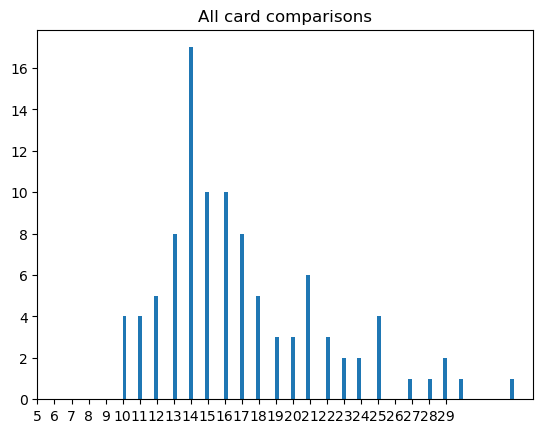

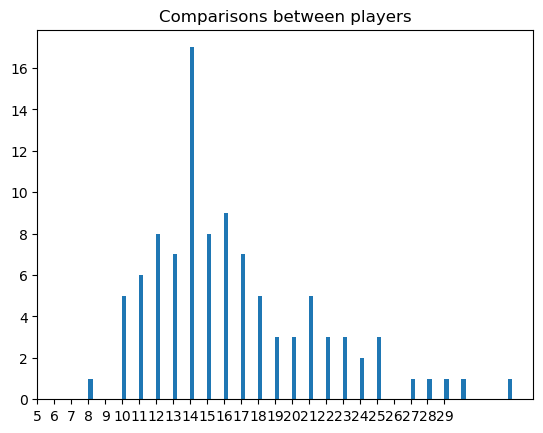

In [27]:
# Plot histogram of distribution of max gaps under each method
# Use the same x axis on both plots to make comparison easy

plt.hist(all_cards_max_gaps, bins = 100)
plt.xticks(range(5, 30))
plt.title('All card comparisons')
plt.show()

plt.hist(between_players_max_gaps, bins = 100)
plt.xticks(range(5, 30))
plt.title('Comparisons between players')
plt.show()


# JUST SHOWING SHIFTING DISTRIBUTION

Answer: Gaps are slightly larger when we consider all card comparisons, not just those between players, though they are close.

Run simulations for different choices of the number of cards and players and see when the difference between these two is larger.

Compute the mean of the two distributions. When is this difference larger? How does this depends of the total number of players `n`?

In [28]:
# Lists of N, n, and k to try
# - N : Total number of cards
# - n : Number of players
# - k : Number of cards per player
N_to_try = [50, 100, 200]
n_to_try = [3, 6, 10]
k_to_try = [2, 3, 5]

# Empty dataframe to store results
# For now, going to store the means
import pandas as pd
means_df = pd.DataFrame(columns=['N', 'n', 'k', 'All Comparisons Mean', 'Between Player Mean'])

# Create list of 100 draws for each combination of N, n, k
for N in N_to_try:
    for n in n_to_try:
        for k in k_to_try:
            # Create 100 draws
            parameter_draws = [sample_cards(N, n, k) for i in range(100)]
            # List of max gaps with an entry for each of the 100 draws
            ac_max_gaps = [get_max_consecutive_gap(cards) for cards in parameter_draws]
            bp_max_gaps = [get_max_consecutive_gap_between_players(cards) for cards in parameter_draws]
            # Compute means
            mean_ac = np.mean(ac_max_gaps)
            mean_bp = np.mean(bp_max_gaps)
            # Add parameters and means to dataframe
            means_df = pd.concat([means_df, pd.DataFrame([[N, n, k, mean_ac, mean_bp]], columns=['N', 'n', 'k', 'All Comparisons Mean', 'Between Player Mean'])])

num players
3
num cards per player
2
player ids
[[1 1]
 [2 2]
 [3 3]]
flat_cards
[34 47 31 48 11 38]
flat ids
[1 1 2 2 3 3]
order ids
[4 2 0 5 1 3]
gap cards
[20  3  4  9  1]
gap ids
[-1 -1  2 -2  1]
gap unique
[20  3  4  9  1]
num players
3
num cards per player
2
player ids
[[1 1]
 [2 2]
 [3 3]]
flat_cards
[17 24  6 49  5 29]
flat ids
[1 1 2 2 3 3]
order ids
[4 2 0 1 5 3]
gap cards
[ 1 11  7  5 20]
gap ids
[-1 -1  0  2 -1]
gap unique
[ 1 11  0  5 20]
num players
3
num cards per player
2
player ids
[[1 1]
 [2 2]
 [3 3]]
flat_cards
[34 46 30 33  8 20]
flat ids
[1 1 2 2 3 3]
order ids
[4 5 2 3 0 1]
gap cards
[12 10  3  1 12]
gap ids
[ 0 -1  0 -1  0]
gap unique
[ 0 10  0  1  0]
num players
3
num cards per player
2
player ids
[[1 1]
 [2 2]
 [3 3]]
flat_cards
[19 30 35 40 15 49]
flat ids
[1 1 2 2 3 3]
order ids
[4 0 1 2 3 5]
gap cards
[ 4 11  5  5  9]
gap ids
[-2  0  1  0  1]
gap unique
[4 0 5 0 9]
num players
3
num cards per player
2
player ids
[[1 1]
 [2 2]
 [3 3]]
flat_cards
[27 34 32 33

In [29]:
# Add difference in means as a column
means_df['AC minus BP'] = means_df['All Comparisons Mean'] - means_df['Between Player Mean']

In [30]:
# Print dataframe. Sort by AC minus BP
print(means_df.sort_values(by='AC minus BP'))

     N   n  k  All Comparisons Mean  Between Player Mean  AC minus BP
0   50  10  5                  1.00                 1.00         0.00
0   50  10  2                  7.29                 7.26         0.03
0   50  10  3                  4.74                 4.70         0.04
0  100  10  5                  6.75                 6.65         0.10
0   50   6  5                  4.65                 4.51         0.14
0  200  10  5                 16.01                15.84         0.17
0  100  10  2                 15.33                15.08         0.25
0  100   6  5                 10.79                10.51         0.28
0  100  10  3                 11.55                11.26         0.29
0   50   6  2                 11.02                10.65         0.37
0  100   6  3                 16.77                16.25         0.52
0   50   6  3                  8.09                 7.51         0.58
0  200  10  3                 24.61                23.94         0.67
0  100   6  2       

In [31]:
# PROBLEM - for N = 50, n = 10, k = 5, why is the between player mean 1? 
# Though all the cards are in play, it seems like at least some comparisons would be ruled out...

# NOTE - not a problem. when all cards are in play, the max gap between players should always be 1.
# This is because we are computing the gaps, based on the order statistics, first (all 1). 
# Then we are throwing out those gaps that are not between players. The max of what remains is 1.

# Try to test
test_draw = sample_cards(50, 10, 5)
print(test_draw)
# BAD
print(get_max_consecutive_gap_between_players(test_draw))

[[22 26 31 44 45]
 [29 35 39 40 48]
 [ 3 21 38 43 46]
 [ 9 23 24 27 28]
 [ 6 15 25 33 37]
 [10 12 14 20 47]
 [ 1 17 18 34 42]
 [ 4 11 13 19 49]
 [ 2  7 30 32 36]
 [ 5  8 16 41 50]]
num players
10
num cards per player
5
player ids
[[ 1  1  1  1  1]
 [ 2  2  2  2  2]
 [ 3  3  3  3  3]
 [ 4  4  4  4  4]
 [ 5  5  5  5  5]
 [ 6  6  6  6  6]
 [ 7  7  7  7  7]
 [ 8  8  8  8  8]
 [ 9  9  9  9  9]
 [10 10 10 10 10]]
flat_cards
[22 26 31 44 45 29 35 39 40 48  3 21 38 43 46  9 23 24 27 28  6 15 25 33
 37 10 12 14 20 47  1 17 18 34 42  4 11 13 19 49  2  7 30 32 36  5  8 16
 41 50]
flat ids
[ 1  1  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 10]
order ids
[30 40 10 35 45 20 41 46 15 25 36 26 37 27 21 47 31 32 38 28 11  0 16 17
 22  1 18 19  5 42  2 43 23 33  6 44 24 12  7  8 48 34 13  3  4 14 29  9
 39 49]
gap cards
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1

In [32]:
# Sort by N and k to see impact of n
print(means_df.sort_values(by=['N', 'k', 'AC minus BP']))

     N   n  k  All Comparisons Mean  Between Player Mean  AC minus BP
0   50  10  2                  7.29                 7.26         0.03
0   50   6  2                 11.02                10.65         0.37
0   50   3  2                 15.22                13.90         1.32
0   50  10  3                  4.74                 4.70         0.04
0   50   6  3                  8.09                 7.51         0.58
0   50   3  3                 12.56                10.96         1.60
0   50  10  5                  1.00                 1.00         0.00
0   50   6  5                  4.65                 4.51         0.14
0   50   3  5                  9.25                 8.18         1.07
0  100  10  2                 15.33                15.08         0.25
0  100   6  2                 21.39                20.54         0.85
0  100   3  2                 33.91                31.15         2.76
0  100  10  3                 11.55                11.26         0.29
0  100   6  3       

We can see that the difference in mean maximum gaps tends to be largest when number of players `n` is low. When there are few players, limiting to gaps in between players has a large effect, as many more pairings of cards are not allowed when calculating the max.

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

If we modify our draws of cards for the game to be with replacement, the number of cards above `N/2` will be distributed binomial. The binomial parameter `n` is the number of cards in play (`n*k` for our card game sampling). A card is above `N/2` with probability `p = 1/2`.

In [33]:
# num players cards over N/2, without replacement? no, need with replacement

In [34]:
# Here I modify the card sampling to be with replacement
def sample_cards_w_replacement(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=True)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

In [35]:
# Vector to store number of cards over N/2
game_num_cards_over = []
# Run 100 new games
for game in range(100):
    # Sample with replacement!
    new_game = sample_cards_w_replacement(100, 6, 3)
    # Count cards over N/2
    num_cards_over_N_over_2 = len([card for card in new_game.flatten() if card > (100 / 2)])
    # Append to list
    game_num_cards_over.append(num_cards_over_N_over_2)

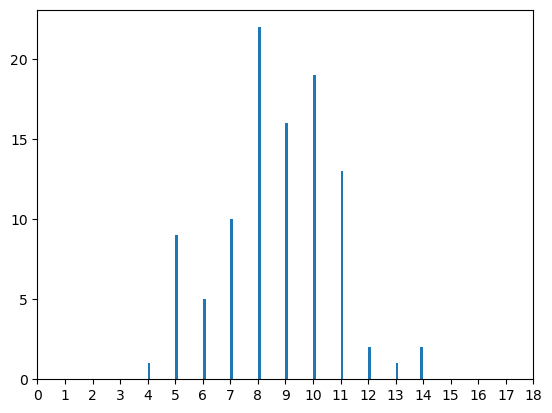

In [36]:
# Plot distribution
plt.hist(game_num_cards_over, bins = 100)
plt.xticks(range(0, 19))
plt.show()

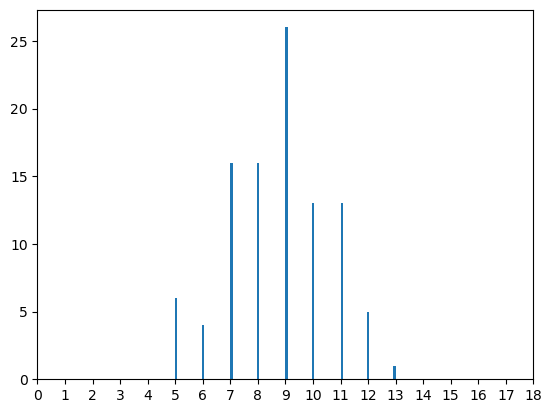

In [37]:
# Numpy distribution to compare to
actual_bin = np.random.binomial(n = 18, p = 0.5, size = 100)
# Plot distribution
plt.hist(actual_bin, bins = 100)
plt.xticks(range(0, 19))
plt.show()

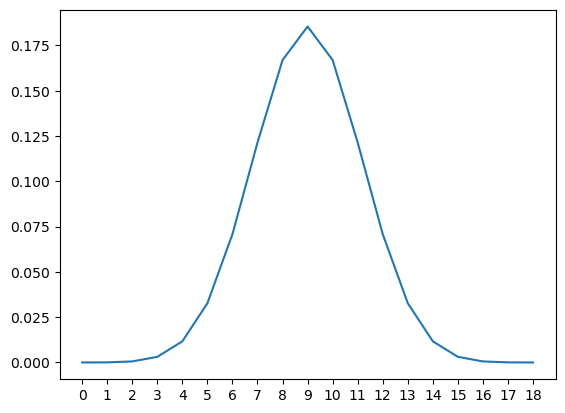

In [38]:
# Scipy distribution to compare to
# I couldn't get actual draws to work (maybe this is deprecated since the docs seem to reference numpy)
# But we can still plot the pmf
import scipy
#actual_bin = scipy.stats.binom(n=18, p=0.5, size=100)
# Plot distribution
#plt.hist(actual_bin, bins = 100)
#plt.xticks(range(0, 19))
x = range(0, 19)
pmf = scipy.stats.binom.pmf(x, 18, 0.5)
plt.plot(x,pmf)
plt.xticks(range(0, 19))
plt.show()

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution follow a Beta distribution. While here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

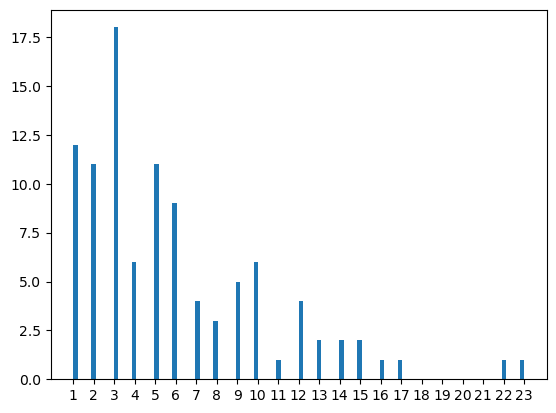

In [39]:
# Repeat our plot from part 1 of draw minimums
plt.hist(draw_minimums, bins = 100)
plt.xticks(range(int(np.min(draw_minimums)), int(np.max(draw_minimums) + 1)))
plt.show()

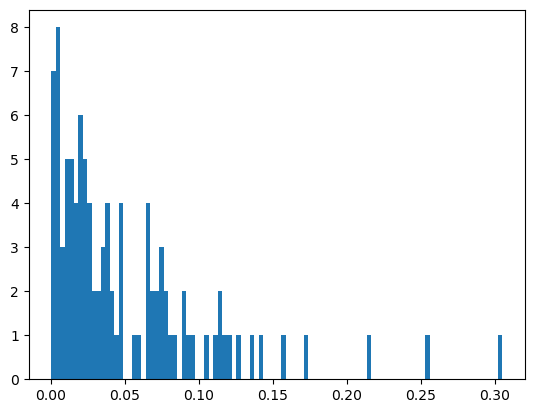

In [40]:
# SWITCH TO DENSITY

# We are looking for the 1st order statistic (1st smallest value), so in the beta k = 1
beta_k = 1
# In part 1 our sample was of size n*k = 18, so in the beta n = 18
beta_n = 18
# Numpy distribution to compare to
actual_beta = np.random.beta(a = beta_k, b = beta_n + 1 - beta_k, size = 100)
# Plot distribution
plt.hist(actual_beta, bins = 100)
plt.show()

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

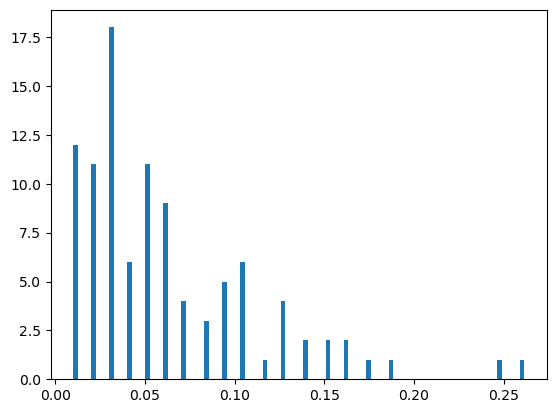

In [41]:
# For 100 draws, use min number in the sample to calculate transformed variable X
# N = 100
X_vals = [- np.log(1 - (sample_min / 100)) for sample_min in draw_minimums]

# Plot distribution
plt.hist(X_vals, bins = 100)
plt.show()

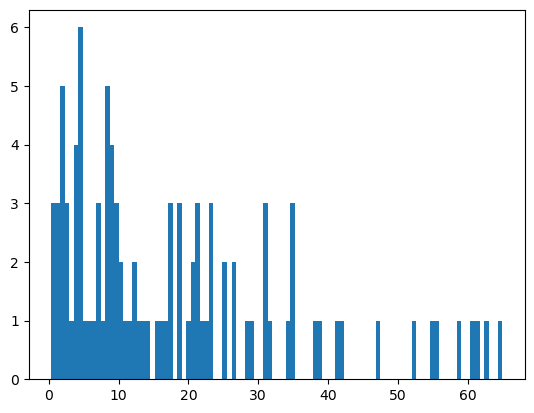

In [42]:
# SWITCH TO DENSITY

# Plot 100 exponential draws with parameter n*k (6*3 = 18 in our initial game)
actual_expo = np.random.exponential(scale = 6*3, size = 100)
# Plot distribution
plt.hist(actual_expo, bins = 100)
plt.show()

### 4. What happens when $n * k << N$?

Some of the distributions we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without replacement compare as $n * k << N$. What do you expect to see in these cases? When will the difference between the two sampling strategies lead to similar or different results?

We expect to see convergence of sampling with and without replacement when $n * k << N$. When N is large removing a number from the potential outcomes for a draw when you sample without replacement does not have much of an impact on overall probabilities. Here I keep `n*k` fixed and increase `N`.

N is20
without replacement


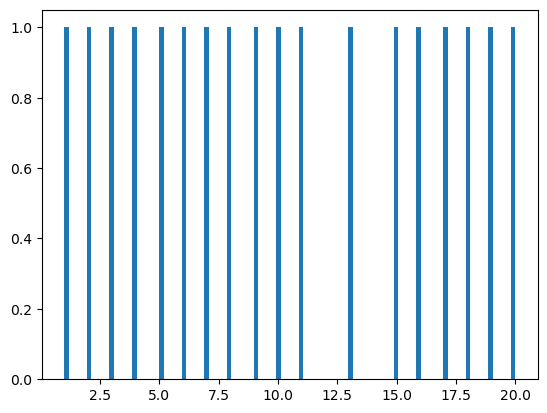

with replacement


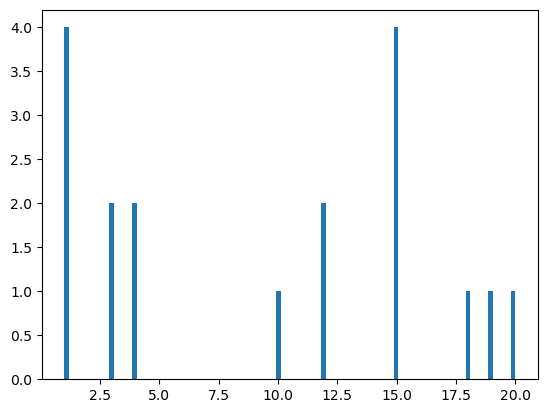

N is50
without replacement


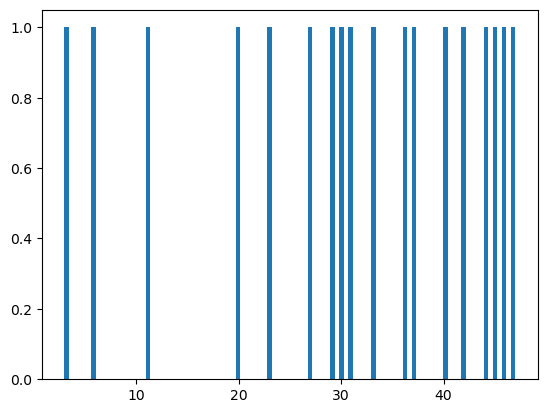

with replacement


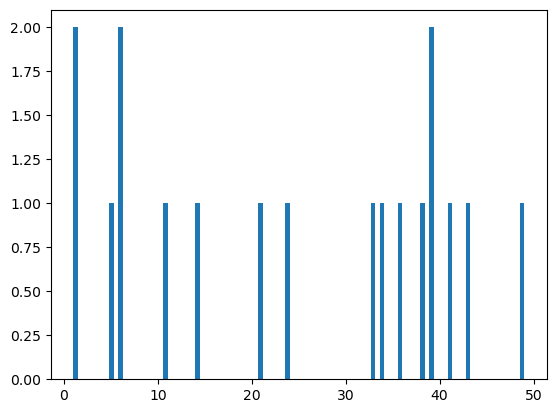

N is100
without replacement


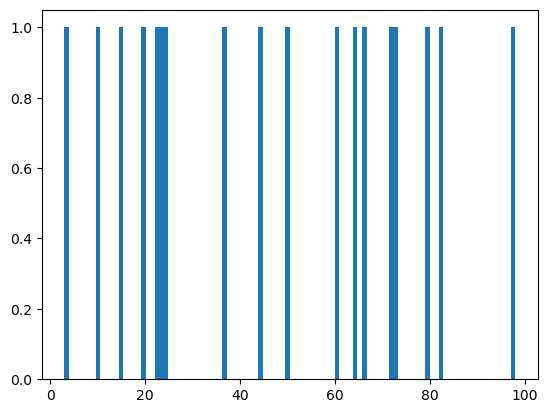

with replacement


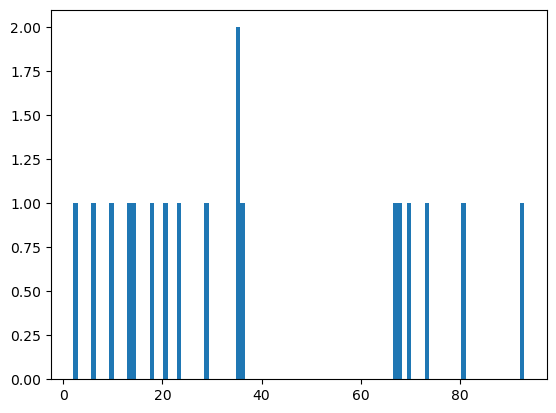

N is500
without replacement


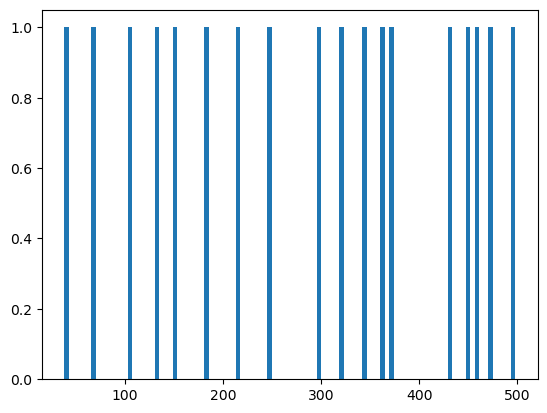

with replacement


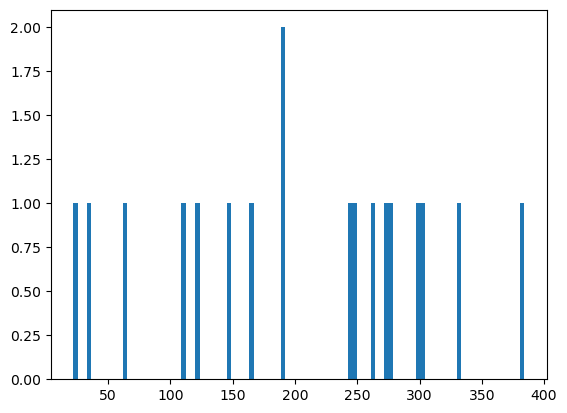

N is1000
without replacement


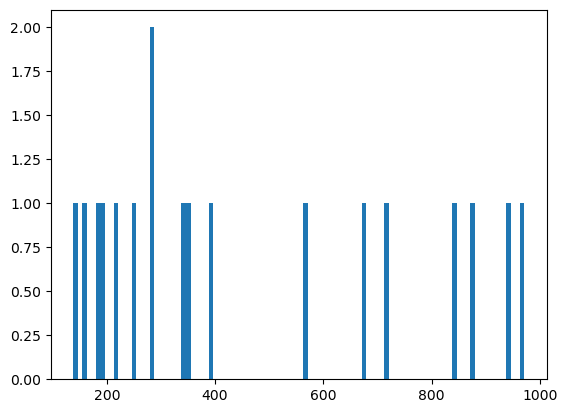

with replacement


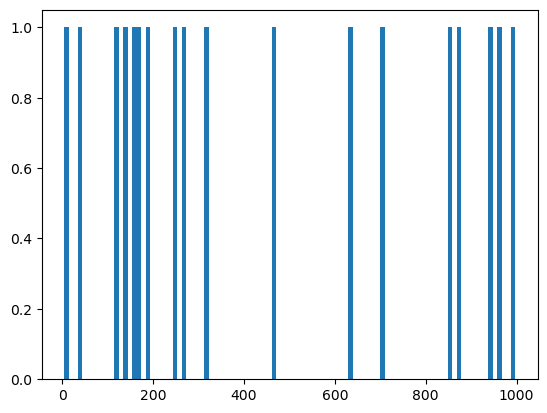

In [43]:
growing_N = [20, 50, 100, 500, 1000]
# INCREASE AS NEEDED TO SHOW THEY ARE THE SAME

# Overlay histograms of cards from draws without and with replacement
for N in growing_N:
    draw_without_replacement = sample_cards(N, 6, 3)
    draw_with_replacement = sample_cards_w_replacement(N, 6, 3)
    print("N is " + str(N))
    print('without replacement')
    plt.hist(draw_without_replacement.flatten(), bins = 100)
    plt.show()
    print('with replacement')
    plt.hist(draw_with_replacement.flatten(), bins = 100)
    plt.show()

# Potentially need means? Or some other summary statistic? Can't just plot results and necessarily expect it to work out...

### Contribution statement

Please include a list of the students you worked with during this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Isaac Liu (ijyliu)
- Member No2: 
- Member No3: